In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [6]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=5000)
x_train = sequence.pad_sequences(x_train,maxlen=100)
x_test = sequence.pad_sequences(x_test,maxlen=100)

In [7]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5, padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,batch_size=100,epochs=5,validation_data = (x_test,y_test))

Epoch 1/5
250/250 [==============================] - 43s 164ms/step - loss: 0.4485 - accuracy: 0.7738 - val_loss: 0.3674 - val_accuracy: 0.8376
Epoch 2/5
250/250 [==============================] - 46s 185ms/step - loss: 0.2960 - accuracy: 0.8754 - val_loss: 0.3333 - val_accuracy: 0.8558
Epoch 3/5
250/250 [==============================] - 49s 198ms/step - loss: 0.2537 - accuracy: 0.8944 - val_loss: 0.3250 - val_accuracy: 0.8598
Epoch 4/5
250/250 [==============================] - 33s 132ms/step - loss: 0.2161 - accuracy: 0.9154 - val_loss: 0.3285 - val_accuracy: 0.8549
Epoch 5/5
250/250 [==============================] - 28s 114ms/step - loss: 0.1802 - accuracy: 0.9325 - val_loss: 0.3500 - val_accuracy: 0.8550


In [10]:
print('Test Accuracy : %.4f' %(model.evaluate(x_test,y_test)[1]))

782/782 [==============================] - 9s 11ms/step - loss: 0.3500 - accuracy: 0.8550
Test Accuracy : 0.8550


In [11]:
y_vloss = history.history['val_loss']

In [12]:
y_loss = history.history['loss']

In [17]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

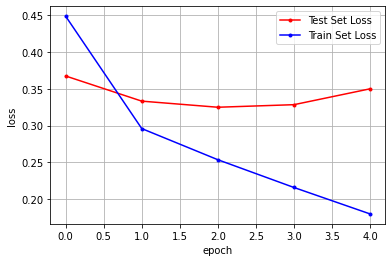

In [15]:
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Test Set Loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label = 'Train Set Loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

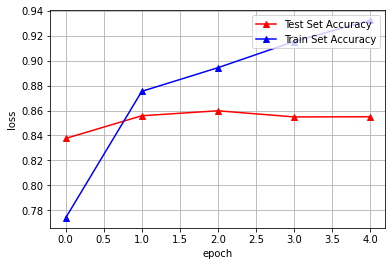

In [19]:

plt.plot(x_len,y_vacc,marker='^',c='red',label='Test Set Accuracy')
plt.plot(x_len,y_acc,marker='^',c='blue',label = 'Train Set Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()